Esse arquivo descreve algumas etapas e procedimentos para auxiliar no cáculo do AoA:

In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [138]:
data =pd.read_json(r"C:\Users\pedro\OneDrive\Documentos\Eletrica\Eletrica\TCC - Macapá\TCC-AoA\teste do final 4-10\data.json")
data

,index,mac,timestamp,no,rssi,raw,Angle,Distance,frequency,iq
0,0,c300000a7a63,2024-10-04 15:45:53.217000+00:00,0,-52,0201061bff3906cafb0114fff9ffe200fd000000000000...,90,200,2426,"[97, -130, 107, 121, -138, 80, -51, -154, 165,..."
1,1,c300000a7a63,2024-10-04 15:45:53.740000+00:00,0,-55,0201061bff3906cafb0114f9ffe2fffd00000000000000...,90,200,2480,"[-155, -73, 94, -150, 115, 121, -139, 98, -52,..."
2,2,c300000a7a63,2024-10-04 15:45:54.273000+00:00,0,-58,0201061bff3906cafb0114f9ffe4ff0001000000000000...,90,200,2480,"[-83, -157, 169, -58, 14, 170, -177, -24, 51, ..."
3,3,c300000a7a63,2024-10-04 15:45:54.786000+00:00,0,-53,0201061bff3906cafb0114f9ffe7ff0001000000000000...,90,200,2402,"[-147, -58, 92, -131, 101, 121, -143, 71, -48,..."
4,4,c300000a7a63,2024-10-04 15:45:55.320000+00:00,0,-53,0201061bff3906cafb0114f9ffe4ff0001000000000000...,90,200,2402,"[-88, -144, 141, -55, 4, 155, -159, -19, 36, -..."
...,...,...,...,...,...,...,...,...,...,...
8609,228,c300000a7a48,2024-10-04 17:05:24.358000+00:00,0,-56,0201061bff3906cafb01140000ecff0001000000000000...,0,100,2402,"[-47, 171, -145, -56, 99, -123, 115, 139, -143..."
8610,229,c300000a7a48,2024-10-04 17:05:24.882000+00:00,0,-56,0201061bff3906cafb0114feffecfffd00000000000000...,0,100,2402,"[148, 65, -99, 127, -114, -122, 139, -90, 67, ..."
8611,230,c300000a7a48,2024-10-04 17:05:25.667000+00:00,0,-56,0201061bff3906cafb01140000ffe90102000000000000...,0,100,2426,"[-142, -72, 101, -125, 115, 114, -127, 90, -59..."
8612,231,c300000a7a48,2024-10-04 17:05:25.928000+00:00,0,-57,0201061bff3906cafb01140000e9ff0201000000000000...,0,100,2426,"[-157, -15, 40, -160, 153, 55, -74, 145, -120,..."


In [139]:
sample = data.sample()
sample

,index,mac,timestamp,no,rssi,raw,Angle,Distance,frequency,iq
5223,65,c300000a7a48,2024-10-04 16:54:21.589000+00:00,0,-56,0201061bff3906cafb01140000ffec0100000000000000...,15,200,2402,"[22, -151, 155, 46, -66, 143, -133, -87, 113, ..."


## Separando as dieferenças de fase
A configfuração de antena utilizada foi 2,2,0,5,6; switch slot de 2us; cte 10*8us  

In [140]:
iq = sample["iq"].to_list()[0]
comp = [complex(iq[i-1],iq[i]) for i in range(1,len(iq),2)]
dic = {
    "ref": comp[0:8],
    "a1": comp[8::3],
    "a2": comp[9::3],
    "a3": comp[10::3],
}

In [141]:
# trasnformando isso como função:
def separ_amostras(iq):
    comp = []
    for i in range(0,len(iq)-1,2):
        comp.append(complex(iq[i],iq[i+1]))
    dic = {
    "ref": np.array(comp[:8]),
    "a1": np.array(comp[8:len(comp)-1:3]),
    "a2": np.array(comp[9::3]),
    "a3": np.array(comp[10::3]),
    }
    return dic

In [142]:
data["samples"] = data["iq"].map(separ_amostras)

## Diferenças de fase entre as antenas

In [143]:
sample = data.sample()
sample

,index,mac,timestamp,no,rssi,raw,Angle,Distance,frequency,iq,samples
2872,9,c300000a7a48,2024-10-04 16:45:15.117000+00:00,0,-49,0201061bff3906cafb01140000ffef0102000000000000...,30,100,2402,"[-15, -204, 203, 28, -45, 202, -182, -80, 108,...","{'ref': [(-15-204j), (203+28j), (-45+202j), (-..."


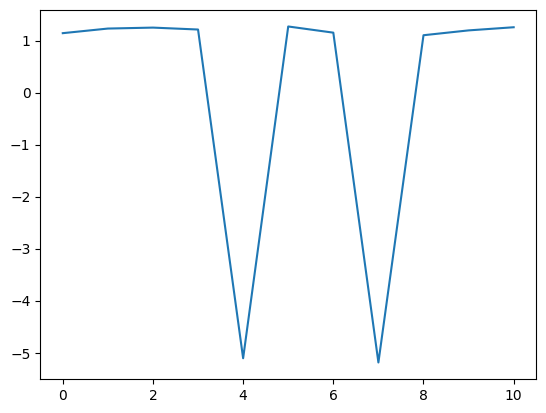

In [144]:
plt.plot(np.angle(sample["samples"].to_list()[0]["a2"]) - np.angle(sample["samples"].to_list()[0]["a1"]))

In [155]:
# como função
def phase_diffs(complex_samples):
    dic = {
        "a2-a1" : (np.angle(complex_samples["a2"]) - np.angle(complex_samples["a1"])),
        "a3-a2" : (np.angle(complex_samples["a3"]) - np.angle(complex_samples["a2"])),
        "a3-a1" : (np.angle(complex_samples["a3"]) - np.angle(complex_samples["a1"])),
    }
    return dic

In [156]:
data["phase_diffs"] = data["samples"].map(phase_diffs)

# Calculando o AoA pela teoria

In [157]:
def to_plus_minus_pi(angle):
    while angle >= np.pi:
        angle -= 2 * np.pi
    while angle < -np.pi:
        angle += 2 * np.pi
    return angle

to_plus_minus_pi = np.vectorize(to_plus_minus_pi)

sample = data.sample()
sample

,index,mac,timestamp,no,rssi,raw,Angle,Distance,frequency,iq,samples,phase_diffs,aoa_no,aoa_minus,aoa_plus
2159,159,c300000a7a63,2024-10-04 16:17:52.273000+00:00,0,-54,0201061bff3906cafb0114fff6ffe40100000000000000...,45,150,2402,"[175, -109, 64, 194, -205, 16, 29, -207, 201, ...","{'ref': [(175-109j), (64+194j), (-205+16j), (2...","{'a2-a1': [1.5617337133597742, 1.5720687653242...","{'aoa_12': [128.38658088015808, 128.6875866028...","{'aoa_32': [133.57672723182648, 135.0076544441...","{'aoa_12': [35.97519271547094, 36.374089838388..."


In [158]:
ss = sample["samples"].to_list()[0]

ref = to_plus_minus_pi(np.angle(ss["ref"][1:]) - np.angle(ss["ref"][:-1]))
ref

pds = sample["phase_diffs"].to_list()[0]
{
    "aoa_12": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a2-a1"] - 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
    "aoa_32": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a2"] - 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
    "aoa_31": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a1"] - 3*2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
}

{'aoa_12': array([144.02480728, 143.62591016, 144.76448951, 145.47780881,
        145.1050407 , 142.8287715 , 147.46261869, 145.92236277,
        147.21134636, 146.4288121 , 148.64078501]),
 'aoa_32': array([133.57672723, 135.00765444, 130.58082162, 133.96799126,
        135.9001181 , 131.91655038, 132.94120471, 130.84011452,
        130.75454917, 135.23097393, 130.29215662]),
 'aoa_31': array([115.50322458, 116.38038148, 113.53271683, 116.75191543,
        118.05345281, 113.38116005, 117.1456072 , 114.46861152,
        115.17971411, 118.36691068, 115.63089467])}

In [159]:
def aoa_no_correction(ref, pds):
    ref = to_plus_minus_pi(np.angle(ref[1:]) - np.angle(ref[:-1]))
    dic = {
    "aoa_12": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a2-a1"])*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
    "aoa_32": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a2"])*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
    "aoa_31": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a1"])*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
    }
    return dic

def aoa_plus_correction(ref, pds):
    ref = to_plus_minus_pi(np.angle(ref[1:]) - np.angle(ref[:-1]))
    dic = {
    "aoa_12": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a2-a1"]+ 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
    "aoa_32": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a2"]+ 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
    "aoa_31": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a1"]+ 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
    }
    return dic

def aoa_minus_correction(ref, pds):
    ref = to_plus_minus_pi(np.angle(ref[1:]) - np.angle(ref[:-1]))
    dic = {
    "aoa_32": np.rad2deg(np.arccos( np.clip(to_plus_minus_pi(pds["a3-a2"]- 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3),-1,1) )),
    "aoa_12": np.rad2deg(np.arccos( np.clip(to_plus_minus_pi(pds["a2-a1"]- 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3),-1,1) )),
    "aoa_31": np.rad2deg(np.arccos( np.clip(to_plus_minus_pi(pds["a3-a1"]- 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3),-1,1) )),
    }
    return dic

In [160]:
data["aoa_no"] = [aoa_no_correction(row[1]["samples"]["ref"], row[1]["phase_diffs"]) for row in data.iterrows()]
data["aoa_minus"] = [aoa_minus_correction(row[1]["samples"]["ref"], row[1]["phase_diffs"]) for row in data.iterrows()]
data["aoa_plus"] = [aoa_plus_correction(row[1]["samples"]["ref"], row[1]["phase_diffs"]) for row in data.iterrows()]
data 

C:\Users\pedro\AppData\Local\Temp\ipykernel_24244\1026834288.py:5: RuntimeWarning: invalid value encountered in arccos
  "aoa_32": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a2"])*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
C:\Users\pedro\AppData\Local\Temp\ipykernel_24244\1026834288.py:4: RuntimeWarning: invalid value encountered in arccos
  "aoa_12": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a2-a1"])*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
C:\Users\pedro\AppData\Local\Temp\ipykernel_24244\1026834288.py:6: RuntimeWarning: invalid value encountered in arccos
  "aoa_31": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a1"])*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
C:\Users\pedro\AppData\Local\Temp\ipykernel_24244\1026834288.py:15: RuntimeWarning: invalid value encountered in arccos
  "aoa_31": np.rad2deg(np.arccos( to_plus_minus_pi(pds["a3-a1"]+ 2*np.mean(ref))*(299_792_458/2400e6)/(2*np.pi*50e-3) )),
C:\Users\pedro\AppData\Local\Temp\ipykernel_24244\1026834288.py:14: RuntimeWarning:

,index,mac,timestamp,no,rssi,raw,Angle,Distance,frequency,iq,samples,phase_diffs,aoa_no,aoa_minus,aoa_plus
0,0,c300000a7a63,2024-10-04 15:45:53.217000+00:00,0,-52,0201061bff3906cafb0114fff9ffe200fd000000000000...,90,200,2426,"[97, -130, 107, 121, -138, 80, -51, -154, 165,...","{'ref': [(97-130j), (107+121j), (-138+80j), (-...","{'a2-a1': [-1.7849121685708005, -1.86694637351...","{'aoa_12': [135.2107288580329, 137.92946025688...","{'aoa_32': [79.29260311993599, 86.622506074238...","{'aoa_12': [45.52865570995897, 48.092139548156..."
1,1,c300000a7a63,2024-10-04 15:45:53.740000+00:00,0,-55,0201061bff3906cafb0114f9ffe2fffd00000000000000...,90,200,2480,"[-155, -73, 94, -150, 115, 121, -139, 98, -52,...","{'ref': [(-155-73j), (94-150j), (115+121j), (-...","{'a2-a1': [-2.967884984040228, 3.5850764461528...","{'aoa_12': [nan, nan, nan, nan, nan, nan, nan,...","{'aoa_32': [68.91141046457076, 76.696082378903...","{'aoa_12': [76.09161913125644, 69.657192573837..."
2,2,c300000a7a63,2024-10-04 15:45:54.273000+00:00,0,-58,0201061bff3906cafb0114f9ffe4ff0001000000000000...,90,200,2480,"[-83, -157, 169, -58, 14, 170, -177, -24, 51, ...","{'ref': [(-83-157j), (169-58j), (14+170j), (-1...","{'a2-a1': [-3.0812290714069803, 3.435269246733...","{'aoa_12': [nan, nan, nan, nan, nan, nan, nan,...","{'aoa_32': [69.13988761362035, 72.152293203018...","{'aoa_12': [79.09716812993716, 73.625644854567..."
3,3,c300000a7a63,2024-10-04 15:45:54.786000+00:00,0,-53,0201061bff3906cafb0114f9ffe7ff0001000000000000...,90,200,2402,"[-147, -58, 92, -131, 101, 121, -143, 71, -48,...","{'ref': [(-147-58j), (92-131j), (101+121j), (-...","{'a2-a1': [-3.2722806199490893, 2.958001846861...","{'aoa_12': [nan, nan, nan, nan, nan, nan, nan,...","{'aoa_32': [95.84441372343673, 97.686311311394...","{'aoa_12': [83.04878799124978, 84.261444178451..."
4,4,c300000a7a63,2024-10-04 15:45:55.320000+00:00,0,-53,0201061bff3906cafb0114f9ffe4ff0001000000000000...,90,200,2402,"[-88, -144, 141, -55, 4, 155, -159, -19, 36, -...","{'ref': [(-88-144j), (141-55j), (4+155j), (-15...","{'a2-a1': [-3.2507913833036355, 3.139194576651...","{'aoa_12': [nan, nan, nan, nan, nan, nan, nan,...","{'aoa_32': [99.44682022485561, 100.25231602030...","{'aoa_12': [82.50991694067248, 80.048190044510..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,228,c300000a7a48,2024-10-04 17:05:24.358000+00:00,0,-56,0201061bff3906cafb01140000ecff0001000000000000...,0,100,2402,"[-47, 171, -145, -56, 99, -123, 115, 139, -143...","{'ref': [(-47+171j), (-145-56j), (99-123j), (1...","{'a2-a1': [-5.326898733480915, 0.9680823193385...","{'aoa_12': [67.65200115468043, 67.361149124357...","{'aoa_32': [142.28877957212072, 139.1987685140...","{'aoa_12': [138.2642687108872, 137.86217209774..."
8610,229,c300000a7a48,2024-10-04 17:05:24.882000+00:00,0,-56,0201061bff3906cafb0114feffecfffd00000000000000...,0,100,2402,"[148, 65, -99, 127, -114, -122, 139, -90, 67, ...","{'ref': [(148+65j), (-99+127j), (-114-122j), (...","{'a2-a1': [0.8421368625373686, 0.9095558511840...","{'aoa_12': [70.43695999874784, 68.798412067779...","{'aoa_32': [141.08349591277326, 141.1620300647...","{'aoa_12': [141.2125968295315, 138.82211585784..."
8611,230,c300000a7a48,2024-10-04 17:05:25.667000+00:00,0,-56,0201061bff3906cafb01140000ffe90102000000000000...,0,100,2426,"[-142, -72, 101, -125, 115, 114, -127, 90, -59...","{'ref': [(-142-72j), (101-125j), (115+114j), (...","{'a2-a1': [1.0649068100154628, -5.121383881337...","{'aoa_12': [64.94931531445955, 62.487229785741...","{'aoa_32': [142.12675733379461, 147.9650354759...","{'aoa_12': [133.55417372146235, 130.5803397172..."
8612,231,c300000a7a48,2024-10-04 17:05:25.928000+00:00,0,-57,0201061bff3906cafb01140000e9ff0201000000000000...,0,100,2426,"[-157, -15, 40, -160, 153, 55, -74, 145, -120,...","{'ref': [(-157-15j), (40-160j), (153+55j), (-7...","{'a2-a1': [1.014275436863984, 1.18370463347246...","{'aoa_12': [66.2160997241152, 61.9231593436870...","{'aoa_32': [144.32072371462306, 145.0861453605

In [161]:
data.to_json("./data.json")